In [289]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [290]:
df = pd.read_csv('investments_VC.csv', low_memory = False, encoding = 'iso-8859-1')
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [291]:
# Columns and their types
df.dtypes

permalink                object
name                     object
homepage_url             object
category_list            object
 market                  object
 funding_total_usd       object
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds          float64
founded_at               object
founded_month            object
founded_quarter          object
founded_year            float64
first_funding_at         object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
round_A 

In [292]:
summary = df.describe().transpose()
# summary

Number of unique sectors: 754
Displaying first 10 Sectors:
                    market  counts
30                     NaN    8824
5                Software     4620
22          Biotechnology     3688
27                 Mobile     1983
8              E-Commerce     1805
7             Curated Web     1655
24    Enterprise Software     1280
106           Health Care     1207
53       Clean Technology     1200
1                   Games     1182


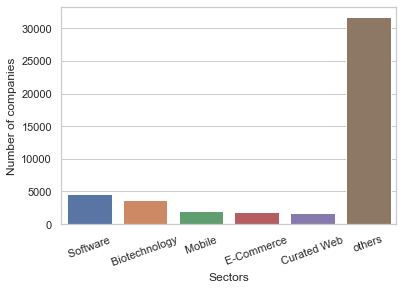

In [293]:
from collections import Counter

counts = Counter(df[' market '])
df_temp = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df_temp.sort_values(0, ascending = False, inplace = True)
df_temp.rename(columns={'index': 'market', 0: 'counts'}, inplace = True)

print('Number of unique sectors: ' + str(len(df_temp)) + '\nDisplaying first 10 Sectors:')
print(df_temp[:10])

top_5_without_nan = df_temp[1:6] # Removes NaN because it is biggest, only for this instance
others = pd.DataFrame(data = {
    'market' : ['others'],
    'counts' : [df_temp['counts'][6:].sum()]
})

df_temp = pd.concat([top_5_without_nan, others])

#plt.pie(list(df_temp['counts']), labels = list(df_temp['market']), autopct = None)
#plt.title('Top 5 Sectors')
#plt.show()

ax = sns.barplot(x=list(df_temp['market']), y=list(df_temp['counts']))
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
ax.set(xlabel='Sectors', ylabel='Number of companies')
plt.show()

[Text(0, 0.5, 'Number of companies reaching this round'),
 Text(0.5, 0, 'Rounds')]

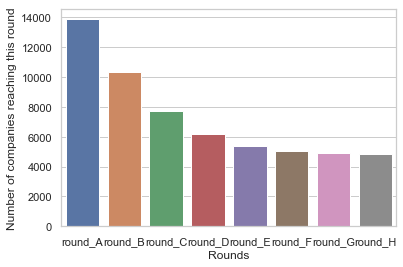

In [294]:
rounds = ['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']
rounds_count = [np.count_nonzero(df[alphabet]) for alphabet in rounds]

sns.set(style="whitegrid")
ax = sns.barplot(x=rounds, y=rounds_count)
ax.set(xlabel='Rounds', ylabel='Number of companies reaching this round')

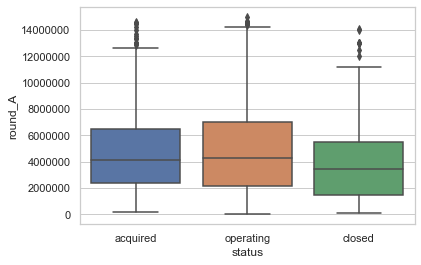

In [317]:
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

df_temp = df.dropna()
df_temp = df_temp[(df_temp['round_A'] != 0)]
df_temp = df_temp[(df_temp['round_A'] < 15000000)]

ax = sns.boxplot(x = 'status', y = 'round_A', data = df_temp)

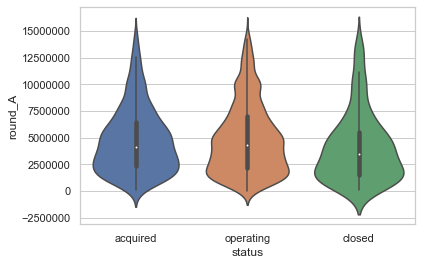

In [319]:
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
ax = sns.violinplot(x = 'status', y = 'round_A', data = df_temp)

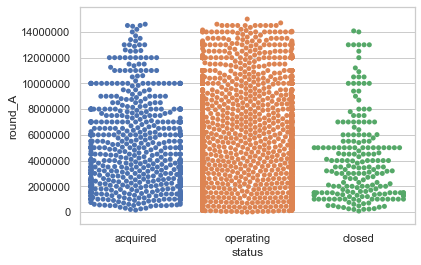

In [320]:
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
ax = sns.swarmplot(x = 'status', y = 'round_A', data = df_temp)

Number of unique sectors in 2000: 138
Displaying first 10 Sectors:
                   market  counts
0               Software      152
2          Biotechnology       97
28   Enterprise Software       56
32           Web Hosting       39
9         Semiconductors       37
13                    NaN      34
10                Mobile       31
30              Security       28
25   Hardware + Software       27
7            Health Care       23
Number of unique sectors in 2010: 414
Displaying first 10 Sectors:
                   market  counts
0               Software      309
12         Biotechnology      197
3                 Mobile      179
15            E-Commerce      171
6                     NaN     171
1            Curated Web      162
18   Enterprise Software      111
4            Advertising      106
19          Social Media      101
31                 Games      100


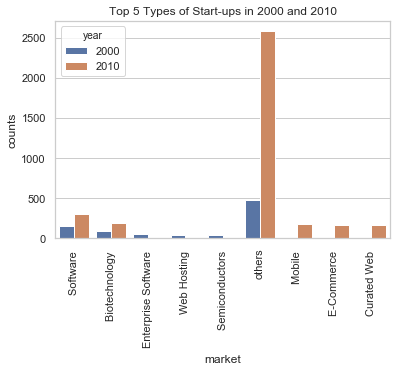

In [295]:
start_ups_2000 = df[df['founded_year'] == 2000]
start_ups_2010 = df[df['founded_year'] == 2010]

counts = Counter(start_ups_2000[' market '])
start_ups_2000 = pd.DataFrame.from_dict(counts, orient='index').reset_index()
start_ups_2000.sort_values(0, ascending = False, inplace = True)
start_ups_2000.rename(columns={'index': 'market', 0: 'counts'}, inplace = True)

counts = Counter(start_ups_2010[' market '])
start_ups_2010 = pd.DataFrame.from_dict(counts, orient='index').reset_index()
start_ups_2010.sort_values(0, ascending = False, inplace = True)
start_ups_2010.rename(columns={'index': 'market', 0: 'counts'}, inplace = True)

print('Number of unique sectors in 2000: ' + str(len(start_ups_2000)) + '\nDisplaying first 10 Sectors:')
print(start_ups_2000[:10])

print('Number of unique sectors in 2010: ' + str(len(start_ups_2010)) + '\nDisplaying first 10 Sectors:')
print(start_ups_2010[:10])

top_5_without_nan_2000 = start_ups_2000[0:6]
others_2000 = pd.DataFrame(data = {
    'market' : ['others'],
    'counts' : [start_ups_2000['counts'][6:].sum()]
})

start_ups_2000 = pd.concat([top_5_without_nan_2000, others_2000])

top_5_without_nan_2010 = start_ups_2010[0:6]
others_2010 = pd.DataFrame(data = {
    'market' : ['others'],
    'counts' : [start_ups_2010['counts'][6:].sum()]
})

start_ups_2010 = pd.concat([top_5_without_nan_2010, others_2010])

start_ups_2000['year'] = len(start_ups_2000) * [2000]
start_ups_2010['year'] = len(start_ups_2010) * [2010]

start_ups_total = pd.concat([start_ups_2000, start_ups_2010])
ax = sns.barplot(x='market', y='counts', hue='year', data=start_ups_total)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Top 5 Types of Start-ups in 2000 and 2010')
sns.set_style("whitegrid")
plt.show()

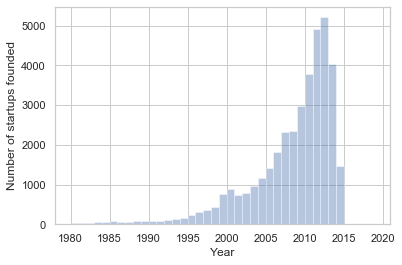

In [296]:
# Display histograms of different data-types
sns.set_style("whitegrid")

sns.distplot(df['founded_year'], bins=range(1980, 2020, 1), kde = False)
plt.xlabel('Year')
plt.ylabel('Number of startups founded')

plt.show()

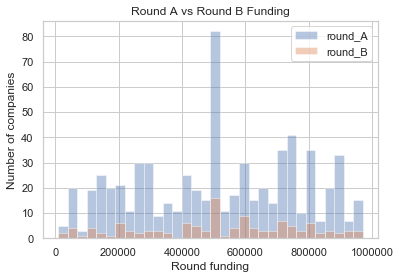

In [297]:
sns.set_style("whitegrid")

sns.distplot(df['round_A'], bins=range(10000, 1000000, 30000), kde = False)
sns.distplot(df['round_B'], bins=range(10000, 1000000, 30000), kde = False)

plt.xlabel('Round funding')
plt.ylabel('Number of companies')
plt.title('Round A vs Round B Funding')
plt.legend(labels=['round_A', 'round_B'])

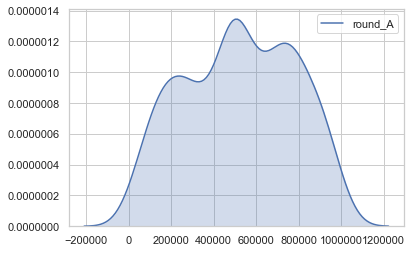

In [298]:
ax = sns.kdeplot(df['round_A'], clip = (10000, 1000000), shade = True)

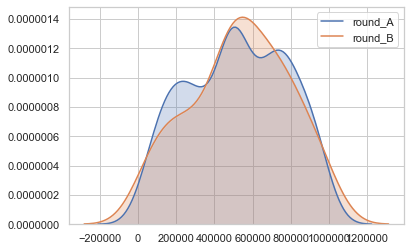

In [299]:
ax = sns.kdeplot(df['round_A'], clip = (10000, 1000000), shade = True)
ax = sns.kdeplot(df['round_B'], clip = (10000, 1000000), shade = True)

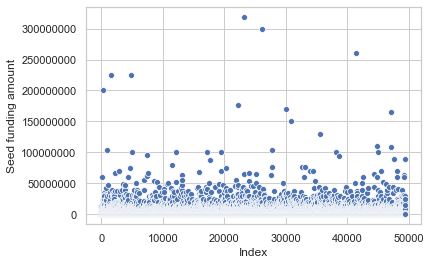

In [300]:
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
ax = sns.scatterplot(x=df.index, y=df['round_A'])
ax.set(xlabel='Index', ylabel='Seed funding amount')
plt.show()

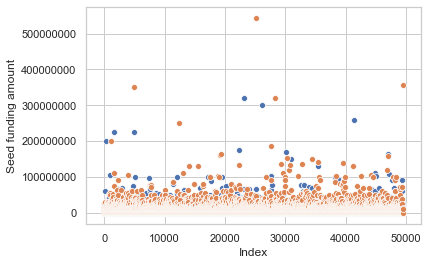

In [301]:
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
ax = sns.scatterplot(x=df.index, y=df['round_A'])
ax = sns.scatterplot(x=df.index, y=df['round_B'])
ax.set(xlabel='Index', ylabel='Seed funding amount')
plt.show()

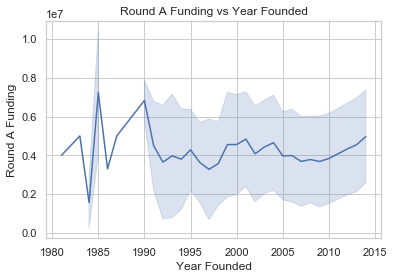

In [302]:
df_temp = df.dropna()
df_temp = df_temp[(df_temp['round_A'] != 0)]
df_temp = df_temp[(df_temp['round_A'] < 10000000)]
df_temp = df_temp[(df_temp['founded_year'] > 1980)]
df_temp = df_temp.sort_values(by = ['founded_year'])

ax = sns.lineplot(x = df_temp['founded_year'], y = df_temp['round_A'], ci = 'sd') # Add another for multiple line-plot
ax.set(xlabel='Year Founded', ylabel='Round A Funding')
plt.title('Round A Funding vs Year Founded')
plt.show()

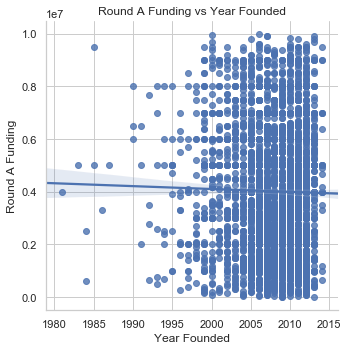

In [338]:
# lm-model
df_temp = df.dropna()
df_temp = df_temp[(df_temp['round_A'] != 0)]
df_temp = df_temp[(df_temp['round_A'] < 10000000)]
df_temp = df_temp[(df_temp['founded_year'] > 1980)]
df_temp = df_temp.sort_values(by = ['founded_year'])

ax = sns.lmplot(x = 'founded_year', y = 'round_A', data = df_temp) # Add another for multiple line-plot
ax.set(xlabel='Year Founded', ylabel='Round A Funding')
plt.title('Round A Funding vs Year Founded')
plt.show()

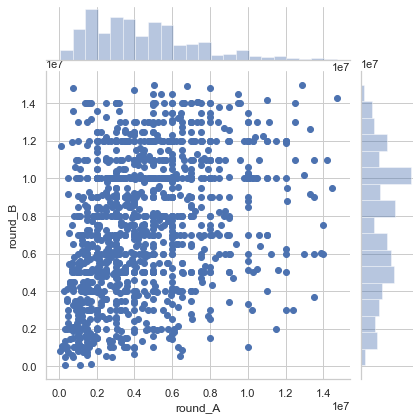

In [322]:
df_temp = df.dropna()
df_temp = df_temp[(df_temp['round_A'] != 0)]
df_temp = df_temp[(df_temp['round_A'] < 15000000)]
df_temp = df_temp[(df_temp['round_B'] != 0)]
df_temp = df_temp[(df_temp['round_B'] < 15000000)]

sns.jointplot(df_temp['round_A'], df_temp['round_B'])

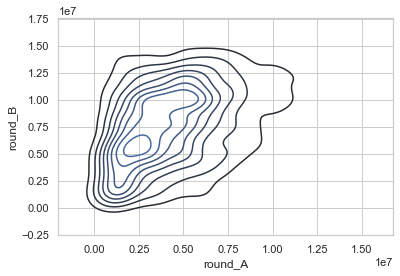

In [333]:
df_temp = df.dropna()
df_temp = df_temp[(df_temp['round_A'] != 0)]
df_temp = df_temp[(df_temp['round_A'] < 15000000)]
df_temp = df_temp[(df_temp['round_B'] != 0)]
df_temp = df_temp[(df_temp['round_B'] < 15000000)]

sns.kdeplot(df_temp['round_A'], df_temp['round_B'])

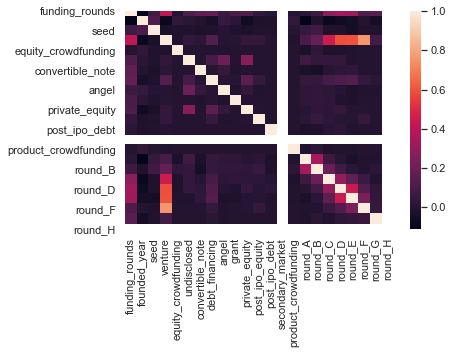

In [334]:
# Correlation of numeric variables for the dataset.
corr = df_temp.corr()
sns.heatmap(corr)

In [1]:
# Zoom in on chart
# i.e. plt.axis([min_x, max_x, min_y, max_y])

In [2]:
# Subplots
# plt.subplot(Number of rows, Number of Columns, Index of subplot)
# plt.subplot(1, 2, 1)
# plt.plot(months, temperature)

# plt.subplot(1, 2, 2)
# plt.scatter(temperature, flights_to_hawaii, marker = 'o')

In [303]:
# Query rows in df
# assignment1 = df[df['assignment_name'] == "Assignment 1"]

In [4]:
# Close and Save
# plt.close('all')
# plt.figure() 
# plt.plot(years, word_length)
# plt.savefig('winning_word_lengths.png')